In [183]:
mm1 <- function(lambdaA = 15, lambdaS = 10, n = 10){ 
    # Momento en que llega a la cola la i-ésima persona
    arribos = cumsum(rexp(n, 1/lambdaA))
    
    # Momento en que entra al servidor la i-ésima persona
    entrada = rep(0,n)
    entrada[1] = arribos[1]
    
    # Tiempo que tarda la i-ésima persona en salir del sistema (una vez que ya entró)
    tiempos_salida = rexp(n, 1/lambdaS)
    
    # Momento en que sale del servidor la i-ésima persona 
    salida = rep(0,n)
    salida[1] = arribos[1] + tiempos_salida[1]

    # Variable auxiliar que representa el número de personas esperando en la cola
    num_esperando = 0
    
    # i representa las llegadas, j las salidas. En este momento estamos esperando la llegada
    # del segundo y la salida del primero, por ello i=2, j=1
    i = 2; j = 1 
    
    # Arreglos auxiliares, representan los momentos en que la cola aumentó o disminuyo y el número 
    # de personas en la cola a partir de dicho momento.
    tiempos_cambio_cola = c(0)
    tamanos_cola = c(0)
    
    while(i<=n || j<n){

        # LLega gente a la cola y el servidor está ocupado
        while(i<=n && arribos[i] < salida[j]){
            
            num_esperando = num_esperando + 1
            tiempos_cambio_cola = append(tiempos_cambio_cola, arribos[i])
            tamanos_cola = append(tamanos_cola, num_esperando)

            i = i+1
        }

        # Sale alguien del servidor y hay gente en la cola
        if (num_esperando > 0){
            
            entrada[j+1] = salida[j]
            salida[j+1] = entrada[j+1] + tiempos_salida[j+1]

            num_esperando =  num_esperando - 1
            tiempos_cambio_cola = append(tiempos_cambio_cola, entrada[j+1])
            tamanos_cola = append(tamanos_cola, num_esperando)
            
            j = j+1 
        }

        # Sale alguien del servidor y no hay gente en la cola
        else{
            entrada[j+1] = arribos[i]
            salida[j+1] = entrada[j+1] + tiempos_salida[j+1]
            i = i+1; j = j+1
        }
    }
    
    # Tiempo de simulación (última salida del servidor)
    Tn = tail(salida, n=1)

    # Tiempo promedio de espera en la cola
    promedio_espera = sum(entrada-arribos) / (n)
    
    # Porcentaje de utilización del servidor
    utilizacion = 100 * sum(salida - entrada) / (Tn)
    
    # Promedio de tiempo en el sistema (cola + servidor)
    promedio_tiempo_en_sistema = sum(salida-arribos)/n
    
    # Longitud máxima alcanzada por la cola
    long_max_cola = max(tamanos_cola)
    
    # Máximo tiempo de espera en la cola
    max_espera = max(entrada-arribos)

    # El número promedio de clientes en la cola
    promedio_clientes = 0
    for(i in 2 : length(tiempos_cambio_cola)) {
        promedio_clientes = promedio_clientes + (tiempos_cambio_cola[i] - tiempos_cambio_cola[i-1])*(tamanos_cola[i-1])
    }
    promedio_clientes = promedio_clientes / (Tn)
    
    
    plot_df = data.frame(Tiempo = tiempos_cambio_cola, Tamano_cola = tamanos_cola)
    return (list( promedio_espera, utilizacion , promedio_clientes, promedio_tiempo_en_sistema, long_max_cola, max_espera, plot_df))
}

In [262]:
df <- data.frame(0,0,0,0,0,0)
names(df)<-c("Promedio_espera","Utilizacion","Promedio_clientes", "Promedio_tiempo_en_sistema", 'Long_max_cola', 'Max_espera_en_cola')

for (i in 1:100){
    ans = mm1(lambdaA = 5, lambdaS = 4, n = 1000)
    df[nrow(df) + 1,] = c(ans[1:6])
}
df <- data.frame(df[-1, ])
row.names(df) <- NULL

In [263]:
df

Promedio_espera,Utilizacion,Promedio_clientes,Promedio_tiempo_en_sistema,Long_max_cola,Max_espera_en_cola
14.73370,77.74302,2.887725,18.70029,18,80.45937
14.73370,77.74302,2.887725,18.70029,18,80.45937
13.85932,78.57067,2.711453,17.87539,20,91.28634
13.85932,78.57067,2.711453,17.87539,20,91.28634
12.10441,77.85583,2.389388,16.04851,15,67.59338
12.10441,77.85583,2.389388,16.04851,15,67.59338
18.37259,79.67589,3.671056,22.36014,25,104.58504
18.37259,79.67589,3.671056,22.36014,25,104.58504
11.71336,78.92142,2.257652,15.80803,13,61.28355
11.71336,78.92142,2.257652,15.80803,13,61.28355


In [211]:
require(gridExtra)

Loading required package: gridExtra


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


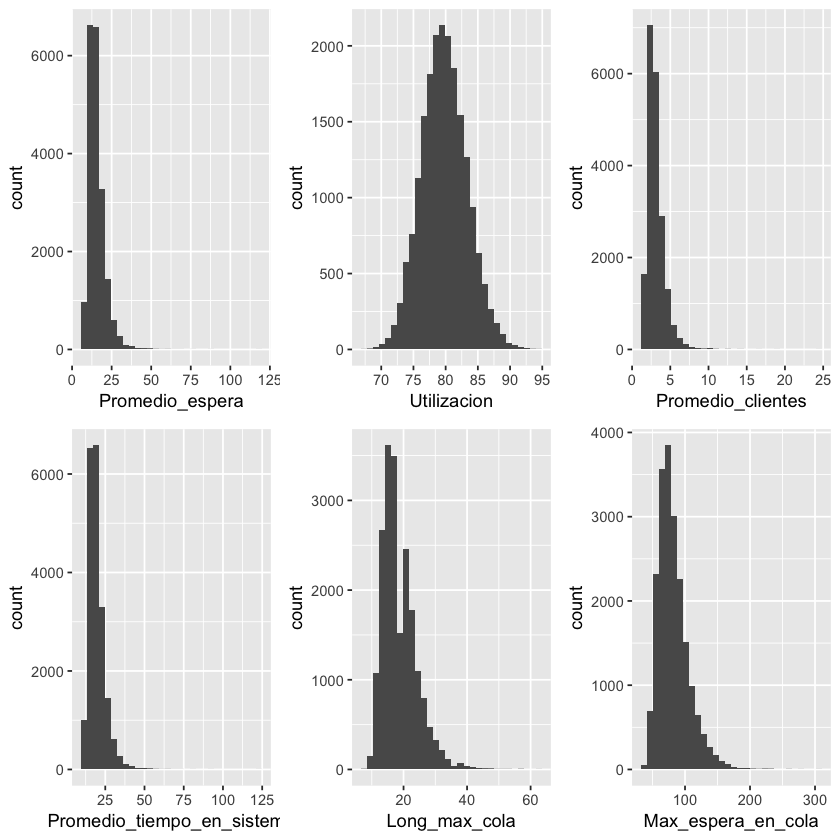

In [259]:
Promedio_espera_hist    = ggplot(df, aes(Promedio_espera)) +
                            geom_histogram()
Utilizacion_hist        = ggplot(df, aes(Utilizacion)) +
                            geom_histogram()
Promedio_clientes_hist  = ggplot(df, aes(Promedio_clientes)) +
                            geom_histogram()
tiempo_en_sistema_hist  = ggplot(df, aes(Promedio_tiempo_en_sistema)) +
                            geom_histogram()
Long_max_cola_hist      = ggplot(df, aes(Long_max_cola)) +
                            geom_histogram()
Max_espera_en_cola_hist = ggplot(df, aes(Max_espera_en_cola)) +
                            geom_histogram()

grid.arrange(Promedio_espera_hist, Utilizacion_hist, 
             Promedio_clientes_hist, tiempo_en_sistema_hist,
             Long_max_cola_hist, Max_espera_en_cola_hist,
             ncol=3)

In [199]:
summary(df)
16
5/4
16/5

 Promedio_espera   Utilizacion    Promedio_clientes Promedio_tiempo_en_sistema
 Min.   : 8.283   Min.   :71.46   Min.   :1.607     Min.   :12.03             
 1st Qu.:11.948   1st Qu.:77.78   1st Qu.:2.361     1st Qu.:15.97             
 Median :14.445   Median :79.88   Median :2.865     Median :18.51             
 Mean   :15.607   Mean   :80.12   Mean   :3.121     Mean   :19.63             
 3rd Qu.:18.309   3rd Qu.:82.53   3rd Qu.:3.617     3rd Qu.:22.46             
 Max.   :33.494   Max.   :91.82   Max.   :7.199     Max.   :37.77             
 Long_max_cola   Max_espera_en_cola
 Min.   :11.00   Min.   : 45.50    
 1st Qu.:15.00   1st Qu.: 65.31    
 Median :17.00   Median : 79.10    
 Mean   :18.17   Mean   : 81.46    
 3rd Qu.:22.00   3rd Qu.: 92.67    
 Max.   :34.00   Max.   :157.49    

[1] 16

[1] 1.25

[1] 3.2

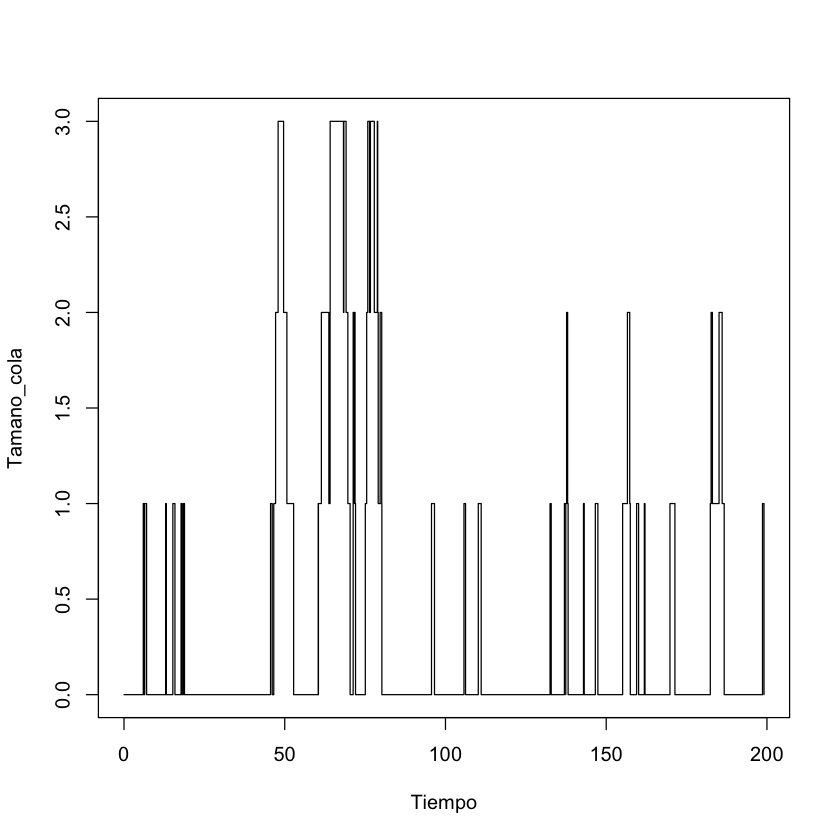

In [254]:
dd = mm1_s(lambdaA = 2, lambdaS = 1, n = 100)[7]
plot(data.frame(dd) ,  type='s')